<a href="https://colab.research.google.com/github/arife-16/WISER2025/blob/main/Introduction_to_LCUs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 84.7 MB/s eta 0:00:00


**The core idea behind Linear Combination of Unitaries (LCU) is to execute non-unitary operations on a quantum computer. Since quantum computers can only perform unitary operations directly, LCU provides a clever workaround by using an extra qubit (called an ancillary qubit) and a probabilistic scheme.**

The challenge asks you to implement a circuit that probabilistically applies the operation $A=
\alpha U+
\beta V$ to a target qubit, where U and V are unitary matrices and
alpha and
beta are positive real coefficients. **The sum A is not necessarily unitary itself.**

You are tasked with completing two functions:

1. W(alpha, beta): This function should return a unitary matrix W.
2. linear_combination(U, V, alpha, beta): This function should build the full quantum circuit and return the measurement probabilities on the ancillary qubit.

The challenge states that the linear combination is successfully applied when the ancillary qubit is measured in the state ∣0⟩
rangle. Your goal is to calculate the probability of this successful outcome.

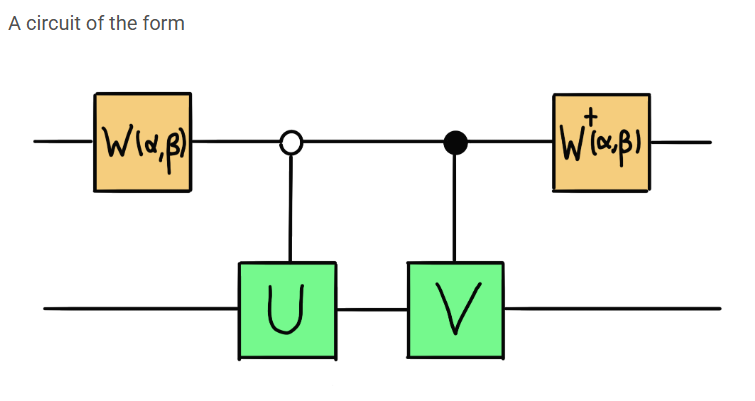

**The LCU Circuit Structure**

The circuit you need to build has a specific structure common to LCU algorithms, often broken down into three conceptual steps: Prepare, Select, and Unprepare.

1. Prepare Step: This step uses the ancillary qubit to create a superposition that encodes the coefficients
alpha and
beta. The operator W, which you need to define, is responsible for this preparation. It acts only on the ancillary qubit.

2. Select Step: This is where the "magic" happens. A series of controlled operations are used to apply the desired unitaries (U and V) to the target qubit based on the state of the ancillary qubit.

* If the ancillary qubit is in a particular state, apply U.

* If the ancillary is in another state, apply V.

3. Unprepare Step: To complete the process, you apply the inverse of the preparation operator ($W^\dagger$). This is crucial for interference to work correctly, isolating the desired outcome.

In [8]:
import json
import pennylane as qml
import pennylane.numpy as np
def W(alpha, beta):
    """ This function returns the matrix W in terms of
    the coefficients alpha and beta

    Args:
        - alpha (float): The prefactor alpha of U in the linear combination, as in the
        challenge statement.
        - beta (float): The prefactor beta of V in the linear combination, as in the
        challenge statement.
    Returns
        -(numpy.ndarray): A 2x2 matrix representing the operator W,
        as defined in the challenge statement
    """

    norm = 1 / np.sqrt(alpha + beta)
    w_matrix = norm * np.array([[np.sqrt(alpha),-np.sqrt(beta)],[np.sqrt(beta),np.sqrt(alpha)]])
    return w_matrix

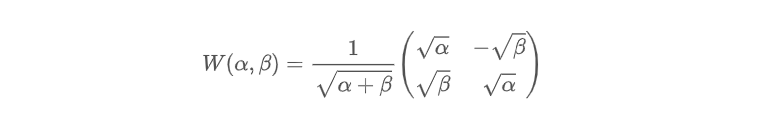

In [9]:
dev = qml.device('default.qubit', wires = 2)

@qml.qnode(dev)
def linear_combination(U, V,  alpha, beta):
    """This circuit implements the circuit that probabilistically calculates the linear combination
    of the unitaries.

    Args:
        - U (list(list(float))): A 2x2 matrix representing the single-qubit unitary operator U.
        - V (list(list(float))): A 2x2 matrix representing the single-qubit unitary operator U.
        - alpha (float): The prefactor alpha of U in the linear combination, as above.
        - beta (float): The prefactor beta of V in the linear combination, as above.

    Returns:
        -(numpy.tensor): Probabilities of measuring the computational
        basis states on the auxiliary wire.
    """

    qml.QubitUnitary(W(alpha, beta), wires=0)
    qml.ControlledQubitUnitary(U, control_wires=0, wires=1, control_values="0")
    qml.ControlledQubitUnitary(V, control_wires=0, wires=1, control_values="1")
    qml.adjoint(qml.QubitUnitary(W(alpha, beta), wires=0))
    return qml.probs(wires=0)
# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:
    dev = qml.device('default.qubit', wires = 2)
    ins = json.loads(test_case_input)
    output = linear_combination(*ins)[0]

    return str(output)

In [10]:
def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, atol=1e-3
    ), "Your circuit doesn't look quite right "

# These are the public test cases
test_cases = [
    ('[[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]],[[1, 0], [0, -1]], 1, 3]', '0.8901650422902458')
]
# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]],[[1, 0], [0, -1]], 1, 3]'...
Correct!


/usr/local/lib/python3.11/dist-packages/pennylane/ops/op_math/controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
